# KMeans
- K개의 그룹(중심점을 기준)으로 데이터 포인트를 나눔

**작동 단계**
1. K개의 중심적 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 > 군집 형성
3. 각 군집의 데이터 포인트 기반으로 새로운 중심점 계싼
4. 2~3 단계를 중심점의 변화가 거의 없을 때까지 반복 실행

**장단점**
- 장점
    - 간단한 개념과 구현
    - 빠른 계산 속도
    - 일반적인 군집화에서 가장 많이 활용되며 대용량 데이터에도 활용 가능
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도 떨어짐
    - 반복적으로 수행하므로 반복 횟수가 많아지면 수행 시간 느려짐
    - 이상치(outlier) 데이터에 취약
    - 군집이 원형 구조가 아닐 경우 성능이 저하 가능성

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
#KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3, # 중심점(=클러스터) 개수
    init='k-means++',   # 초기 클러스터 위치 설정(현재 기본값)
    max_iter=300,
    random_state=-0
)
kmeans.fit(iris.data)
distances = kmeans.transform(iris.data)
distances

iris_df['cluster'] = kmeans.labels_
iris_df.groupby('Species')['cluster'].value_counts()

Species  cluster
0        1          50
1        0          47
         2           3
2        2          36
         0          14
Name: count, dtype: int64

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca1'] = pca_transformed[:,0]
iris_df['pca2'] = pca_transformed[:,1]


In [31]:
kmeans.cluster_centers_ # 클러스터의 중심점

# pca 기반 2차원 변환
centers = pca.transform(kmeans.cluster_centers_)
centers

array([[ 0.66567601, -0.3316042 ],
       [-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856]])

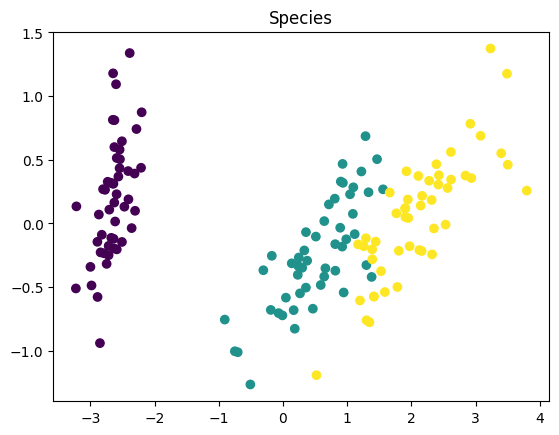

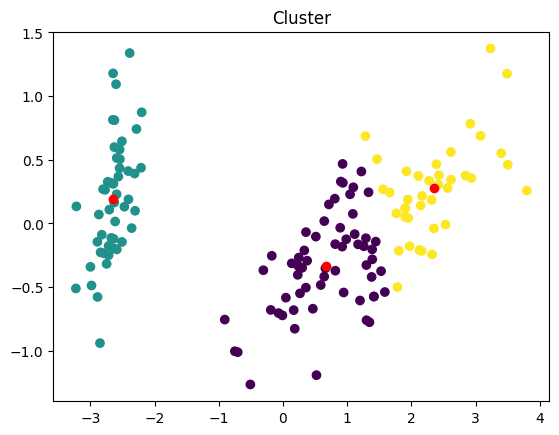

In [32]:
plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['Species'])
plt.title('Species')
plt.show()


plt.scatter(x=iris_df['pca1'], y=iris_df['pca2'], c=iris_df['cluster'])
plt.scatter(x=centers[:,0],y=centers[:,1],c='r')
plt.title('Cluster')
plt.show()

### 과일 데이터 군집

In [33]:
fruits = np.load('./data/fruits_300.npy')
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [34]:
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N/10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < N:
                ax[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            ax[i,j].axis('off')
               
    plt.show()

In [ ]:
fruits_1d = fruits.reshape(-1,100*100)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_1d)
kmeans.transform(fruits_1d)


array([[ 4661.3649493 ,  8642.61845541,  3094.2021583 ],
       [ 5353.49325819,  9030.55531495,  2621.1643038 ],
       [ 4622.86793264,  8494.99543011,  3128.53032176],
       [ 5300.22503847,  9132.8299753 ,  3038.30448273],
       [ 5032.40691964,  8461.52728232,  2635.06533269],
       [ 4350.11675063,  7855.57817995,  4900.64521339],
       [ 4727.52939983,  8558.2291995 ,  2738.57038876],
       [ 4656.52135963,  8677.20797817,  2636.52441605],
       [ 5288.60342196,  8360.33405924,  2709.72461019],
       [ 5514.77511468,  7956.78993771,  3869.39936723],
       [ 4590.76940849,  8352.57326294,  3066.18213505],
       [ 4780.73450474,  8636.78492775,  2627.86222723],
       [ 4514.76430857,  8529.94261235,  2279.26277964],
       [ 5119.22643024,  8334.41299737,  3243.70032469],
       [ 5092.92077066,  8857.76766405,  2784.93156843],
       [ 4017.0062117 ,  8037.67342153,  3573.76137312],
       [ 5293.63820116,  8349.30637291,  2650.14999927],
       [ 5330.38339326,  9291.3

In [37]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [ ]:
# 각 클러스터별 이미지 시각화
draw_fruits(fruits[kmeans.labels_==0])
draw_fruits(fruits[kmeans.labels_==1])
draw_fruits(fruits[kmeans.labels_==2])

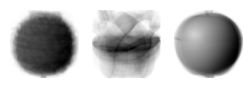

In [41]:
draw_fruits(kmeans.cluster_centers_.reshape(-1,100,100))

In [42]:
pca = PCA(n_components=2)
fruits_pca = pca.fit_transform(fruits_1d)
fruits_pca.shape

(300, 2)

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fruits_pca)
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [44]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

In [ ]:
draw_fruits(fruits[kmeans.labels_==0])
draw_fruits(fruits[kmeans.labels_==1])
draw_fruits(fruits[kmeans.labels_==2])

[0]


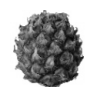

In [48]:
pred = kmeans.predict(fruits_pca[100:101])

print(pred)
draw_fruits(fruits[100:101])

### 최적의 k 값 찾기
- inertia : 중심점으로부터 각 데이터포인트의 분산값
    - 이너셔 값이 작을수록 군집이 잘 되어 있다고 볼 수 있음

- Elbow 기법 : inertia값이 급격히 감소하는 kr값을 최적의 값으로 판단


In [53]:
inertias = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fruits_pca)
    inertias.append(kmeans.inertia_) # inertia 속성 확인 가능
    
inertias

[1207702120.5969849,
 461196976.3137546,
 322138106.6763312,
 246026283.286007,
 187383136.3143462,
 152251955.5613401,
 144887657.0783289,
 120809362.88993698,
 108134288.3432776,
 98990244.2730245]

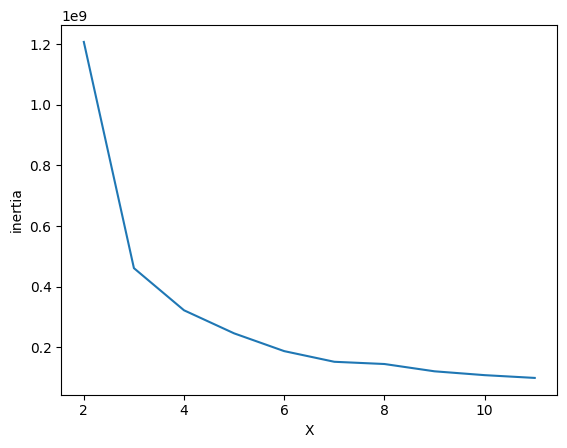

In [54]:
plt.plot(range(2,12), inertias)
plt.xlabel('X')
plt.ylabel('inertia')
plt.show()

# 작동 단계
1. K개의 중심점 임의 선택
2. 각 데이터 포인트를 가장 가까운 중심점에 할당 -> 군집 형성
3. 각 군집의 데이터 포인트